In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('billboard.csv')

**Part A:** Make a table of the top 10 most popular songs since 1958, as measured by the total number of weeks that a song spent on the Billboard Top 100. Note that these data end in week 22 of 2021, so the most popular songs of 2021 will not have up-to-the-minute data; please send our apologies to The Weeknd.

Your table should have 10 rows and 3 columns: performer, song, and count, where count represents the number of weeks that song appeared in the Billboard Top 100. Make sure the entries are sorted in descending order of the count variable, so that the more popular songs appear at the top of the table. Give your table a short caption describing what is shown in the table.

(Note: you'll want to use both performer and song in any group_by operations, to account for the fact that multiple unique songs can share the same title.)

In [26]:
most_popular = df.groupby(by=['performer','song'])['week'].count().reset_index().sort_values(by='week',ascending = False)[:10]
most_popular = most_popular.rename(columns = {'week':'count'}).reset_index()
most_popular = most_popular[['performer','song','count']]

caption = 'This table has the top 10 songs based on the number of weeks that each song spent on the Billboard Top 100.'
most_popular = most_popular.style.set_caption(caption)

most_popular

,performer,song,count
0,Imagine Dragons,Radioactive,87
1,AWOLNATION,Sail,79
2,The Weeknd,Blinding Lights,76
3,Jason Mraz,I'm Yours,76
4,LeAnn Rimes,How Do I Live,69
5,OneRepublic,Counting Stars,68
6,LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,68
7,Jewel,Foolish Games/You Were Meant For Me,65
8,Adele,Rolling In The Deep,65
9,Carrie Underwood,Before He Cheats,64


**Part B:** Is the "musical diversity" of the Billboard Top 100 changing over time? Let's find out. We'll measure the musical diversity of given year as the number of unique songs that appeared in the Billboard Top 100 that year. Make a line graph that plots this measure of musical diversity over the years. The x axis should show the year, while the y axis should show the number of unique songs appearing at any position on the Billboard Top 100 chart in any week that year. For this part, please filter the data set so that it excludes the years 1958 and 2021, since we do not have complete data on either of those years. Give the figure an informative caption in which you explain what is shown in the figure and comment on any interesting trends you see.

There are number of ways to accomplish the data wrangling here. For example, you could use two distinct sets of data-wrangling steps. The first set of steps would get you a table that counts the number of times that a given song appears on the Top 100 in a given year. The second set of steps operate on the result of the first set of steps; it would count the number of unique songs that appeared on the Top 100 in each year, irrespective of how many times it had appeared.

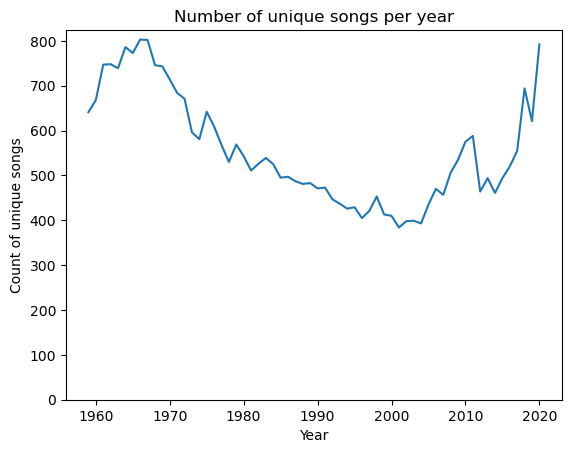

In [95]:
unique_songs = df.groupby('year')['song'].nunique().reset_index()
unique_songs = unique_songs.loc[(unique_songs['year'] > 1958) & (unique_songs['year'] <2021)]


unique_songs.set_index('year').plot(kind='line')
plt.xlabel('Year') 
plt.ylabel('Count of unique songs')
plt.title('Number of unique songs per year')
plt.legend('', frameon=False)
plt.ylim(ymin=0)
plt.show()


Here we can see an interesting trend. Back in the 60s - 70s there was a much diverse Billboard as the number of unique songs was above 600. After the mid 60s a declining trend ocurred and it touched its lowest point in the starting 2000s with around 400 unique songs. After the new millenium, the trend has increased notably and even in 2020 we had similar levels as those seen in the 60s-70s. 

**Part C:** Let's define a "ten-week hit" as a single song that appeared on the Billboard Top 100 for at least ten weeks. There are 19 artists in U.S. musical history since 1958 who have had at least 30 songs that were "ten-week hits." Make a bar plot for these 19 artists, showing how many ten-week hits each one had in their musical career. Give the plot an informative caption in which you explain what is shown.

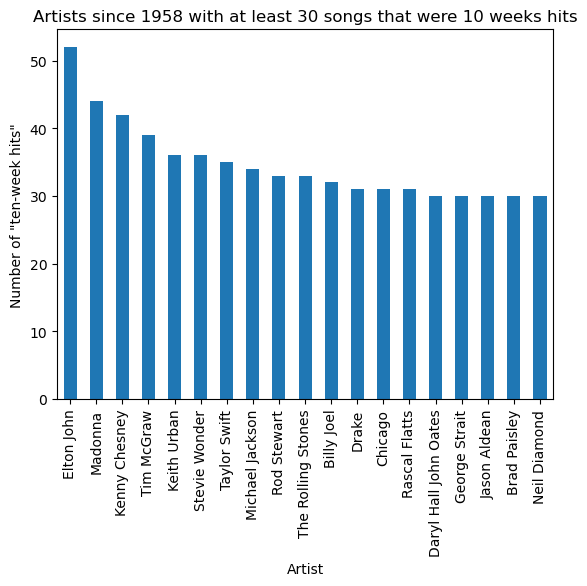

In [94]:
at_least_10 = df.loc[df['weeks_on_chart'] >= 10].groupby('performer')['song'].nunique().reset_index()
at_least_10 = at_least_10.loc[at_least_10['song'] >= 30].sort_values(by ='song', ascending = False)
at_least_10.set_index('performer').plot(kind = 'bar')

plt.xlabel('Artist')
plt.ylabel('Number of "ten-week hits"')
plt.title('Artists since 1958 with at least 30 songs that were 10 weeks hits')
plt.legend('', frameon=False)
plt.show()

In this case, we see that the music diversity once again appears here as some of the performers here had a significant career during the 60s-80s (Elton John, Madonna, Michael Jackson, The Rolling Stones). One interesting thing though, is how artists like Drake and Taylor Swift appear, both of them having a great career after ~2007!